In [1]:
import sage.all
import numpy as np
import time
import math
import matplotlib.pyplot as plt

In [2]:
S = {(2,0), (1,1), (5,2), (7,2), (2,3), (0,4), (7,4), (8,4), (5,5)}
S1 = {(0,0), (1,1), (5,2)}

def tuples_to_vec(S) :
    tmp_S = set()
    for (i,j) in S :
        v = vector([i,j])
        v.set_immutable()
        tmp_S.add(v)
    return tmp_S


In [3]:
#Min_Max S 

def min_S_plus(S) :
    """ list[int] -> int
        Retourne le minimum de (i+j) de l'ensemble S"""
    
    mini = 10000
    
    for (i,j) in S :
        val = (i+j)
        if val < mini :
            mini = val
    
    return mini

def min_S_moins(S) :
    """ list[int] -> int
        Retourne le minimum de (i-j) de l'ensemble S"""
    
    mini = 10000
    
    for (i,j) in S :
        val = (i-j)
        if val < mini :
            mini = val
    
    return mini


def max_S_moins(S) :
    """ list[int] -> int
        Retourne le maximum de (i-j) de l'ensemble S"""
    
    maxi = 0
    
    for (i,j) in S :
        val = (i-j)
        if val > maxi :
            maxi = val
    
    return maxi

def max_S_plus(S) :
    """ list[int] -> int
        Retourne le maximum de (i+j) de l'ensemble S"""
    
    maxi = 0
    
    for (i,j) in S :
        val = (i+j)
        if val > maxi :
            maxi = val
    
    return maxi

In [4]:
def min_S_plus_q(S,q) :
    """ list[int] -> int
        Retourne le minimum de (i+gj) de l'ensemble S"""
    
    mini = 10000
    
    for (i,j) in S :
        val = (i+(q*j))
        if val < mini :
            mini = val
    
    return mini


def min_S_moins_q(S,q) :
    """ list[int] -> int
        Retourne le minimum de (i-gj) de l'ensemble S"""
    
    mini = 10000
    
    for (i,j) in S :
        val = (i-(q*j))
        if val < mini :
            mini = val
    
    return mini


def max_S_moins_q(S,q) :
    """ list[int] -> int
        Retourne le maximum de (i-qj) de l'ensemble S"""
    
    maxi = 0
    
    for (i,j) in S :
        val = (i-(q*j))
        if val > maxi :
            maxi = val
    
    return maxi

def max_S_plus_q(S,q) :
    """ list[int] -> int
        Retourne le maximum de (i+qj) de l'ensemble S"""
    
    maxi = 0
    
    for (i,j) in S :
        val = (i+(q*j))
        if val > maxi :
            maxi = val
    
    return maxi

In [5]:

#Transformations élémentaires :

def lambdas(vec) :
    """ int * int -> int * int
        Retourne (i-j,j)"""
    A = Matrix([[1,-1],[0,1]])
    b = vector([0,0])
    
    
    return A * vec + b

def lambdas_inverse(vec) :
    """ int * int -> int * int
        Retourne (i-j,j)"""
    A = Matrix([[1,1],[0,1]])
    b = vector([0,0])
    return A * vec + b

def nu(vec) :
    """ int * int -> int * int
        Retourne (j,i)"""
    A = Matrix([[0,1],[1,0]])
    b = vector([0, 0])
    return A * vec + b

def tk(vec,k) :
    """ int * int -> int * int
        Retourne (i+k,i)"""
    A = matrix.identity(2)
    b = vector([k, 0])
    return A * vec + b

# Retourne A et b de chaques fonctions : 

def lambdas_couple(vec) :
    """ int * int -> int * int
        Retourne le couple A, b correspondants à lambda, avec A une metrice 2x2 et b un matrice colonne"""
    j = vec[1]
    A = matrix.identity(2)
    b = vector([-j, 0])
    return (A,b)

def lambdas_inverse_couple(vec) :
    """ int * int -> int * int
        Retourne le couple A, b correspondants à lambda_inverse, avec A une metrice 2x2 et b un matrice colonne"""
    j = vec[1]
    A = matrix.identity(2)
    b = vector([j, 0])
    return (A,b)

def nu_couple() :
    """ int * int -> int * int
        Retourne le couple A, b correspondants à nu, avec A une metrice 2x2 et b un matrice colonne"""
    A = Matrix(2,2) + Matrix([[0,1],[1,0]])
    b = vector([0, 0])
    return (A,b)

def tk_couple(vec,k) :
    """ int * int -> int * int
        Retourne le couple A, b correspondants à tau_k, avec A une metrice 2x2 et b un matrice colonne"""
    A = matrix.identity(2)
    b = vector([k, 0])
    return (A,b)
    
# Transformation élémentaires sur S : 

def lambda_S(S) :
    """ set(vec) -> set(tuples(int,int))
        Applique lambdas sur tous les couples (i,j) de S """
    
    S1 = set()
    
    for (i,j) in S :
        
        v =  vector([i,j])
        result = lambdas(v)
        result.set_immutable()
        S1.add(result)
        
    return S1

def lambda_inverse_S(S) :
    """ set(vec) -> set(tuples(int,int))
        Applique lambdas_inverse sur tous les couples (i,j) de S """
    
    S1 = set()
    
    for (i,j) in S :
        
        v =  vector([i,j])
        result = lambdas_inverse(v)
        result.set_immutable()
        S1.add(result)
        
    return S1

def nu_S(S) :
    """ set(tuples(int,int)) -> set(tuples(int,int))
        Applique nu sur tous les couples (i,j) de S """
    
    S1 = set()
    
    for (i,j) in S :
        
        v =  vector([i,j])
        result = nu(v)
        result.set_immutable()
        S1.add(result)
        
    return S1

def tk_S(S,k) :
    """ set(tuples(int,int)) * int -> set(tuples(int,int))
        Applique tk sur tous les couples (i,j) de S """
    
    S1 = set()
    
    for (i,j) in S :
        
        v =  vector([i,j])
        result = tk(v,k)
        result.set_immutable()
        S1.add(result)
        
    return S1

def lambda_U(A, b):
    """
    Matrice 2x2 * Matrice vecteur 2 --> Matrice 2x2 * Matrice vecteur 2
    Rend les matrices A et b correspondant a λ ◦ U 
    """
    Al = Matrix([[-A[1][0],-A[1][1]],[0,0]])
    bl = vector([-b[1], 0])
    
    return Al+A, bl+b


def lambda_inverse_U(A, b):
    """
    Matrice 2x2 * Matrice vecteur 2 --> Matrice 2x2 * Matrice vecteur 2
    Rend les matrices A et b correspondant a λ_inverse ◦ U 
    """
    Al = Matrix([[A[1][0],A[1][1]],[0,0]])
    bl = vector([b[1], 0])
    
    return Al+A, bl+b

def tau_k_U(A, b, k):
    """
    Matrice 2x2 * Matrice vecteur 2 --> Matrice 2x2 * Matrice vecteur 2
    Rend les matrices A et b correspondant a τ ◦ U 
    """
    bt = vector([k, 0])
    
    return A, bt+b

In [6]:
def lambdas_q(vec, q) :
    """ int * int -> int * int
        Retourne (i-qj,j)"""
    A = Matrix([[1,-q],[0,1]])
    b = vector([0,0])
    
    
    return A * vec + b

def lambdas_inverse_q(vec, q) :
    """ int * int -> int * int
        Retourne (i+qj,j)"""
    A = Matrix([[1,q],[0,1]])
    b = vector([0,0])
    return A * vec + b


def lambda_S_q(S, q) :
    """ set(vec) -> set(tuples(int,int))
        Applique lambdas_q sur tous les couples (i,j) de S """
    
    S1 = set()
    
    for (i,j) in S :
        
        v =  vector([i,j])
        result = lambdas_q(v, q)
        result.set_immutable()
        S1.add(result)
        
    return S1

def lambda_inverse_S_q(S, q) :
    """ set(vec) -> set(tuples(int,int))
        Applique lambdas_inverse_q sur tous les couples (i,j) de S """
    
    S1 = set()
    
    for (i,j) in S :
        
        v =  vector([i,j])
        result = lambdas_inverse_q(v, q)
        result.set_immutable()
        S1.add(result)
        
    return S1

def lambda_U_q(A, b, q):
    """
    Matrice 2x2 * Matrice vecteur 2 --> Matrice 2x2 * Matrice vecteur 2
    Rend les matrices A et b correspondant a λ_q ◦ U 
    """
    Al = Matrix([[(-q)*A[1][0],(-q)*A[1][1]],[0,0]])
    bl = vector([(-q)*b[1], 0])
    
    return Al+A, bl+b


def lambda_inverse_U_q(A, b, q):
    """
    Matrice 2x2 * Matrice vecteur 2 --> Matrice 2x2 * Matrice vecteur 2
    Rend les matrices A et b correspondant a λ_inverse_q ◦ U 
    """
    Al = Matrix([[q*A[1][0],q*A[1][1]],[0,0]])
    bl = vector([q*b[1], 0])
    
    return Al+A, bl+b

In [22]:
def support_reduction(S,n) :
    """list[tuples(int)] * int * float -> 
        Reduit S"""
    
    #Matrice A et vecteur b de chaque fonctions :
    S = tuples_to_vec(S)
    #set(tuples(int,int))
    S1 = set()
    #Calcul de dx et dy
    dx = 0
    dy = 0
    tmp = 0 
    for i,j in S:
        if i > dx:
            dx = i
        if j > dy:
            dy = j   
    #print(dx,dy)
    #Initialisation de U : A COMPLETER !!!
    A = matrix.identity(2)
    bm = vector([0,0])
    A.set_immutable()
    bm.set_immutable()
    
    while(True) :
        # (1)
        if dx < dy :
            
            #S := µ(S)
            S = nu_S(S)
            #U := µ ◦ U
            tmp_A,tmp_b = nu_couple()
            A =  tmp_A * A
            bm =  tmp_A * bm
            #print(A,bm)
            # Swap dx and dy
            tmp = dx 
            dx = dy
            dy = tmp

        # (2)
        
        b = dx - max_S_moins(S)
        d = dx + dy - max_S_plus(S)
        f = dy + min_S_moins(S)
        h = min_S_plus(S)
        #print(b,d,f,h)
        
        # (3)
        if b + f > ( ( 1 + n ) * dy ) :
            #S := τdy−f ◦ λ(S)
            S = tk_S(lambda_S(S),dy-f)
            
            # λ ◦ U
            tmp_A,tmp_b = lambda_U(A, bm)
            A = tmp_A
            bm = tmp_b
            
            # τdy−f ◦ λ ◦ U
            tmp_A,tmp_b = tau_k_U(A, bm, dy - f)
            bm = tmp_b
            
            #print("Dans la deuxieme transfo :",A,bm)
            
            dx = dx + dy - b - f
        elif d + h > ((1+n) * dy) :
            #S := τ−h ◦ λ_inverse(U)      
            S = tk_S(lambda_inverse_S(S),-h)
            
            # λ ◦ U
            tmp_A,tmp_b = lambda_inverse_U(A, bm)
            A = tmp_A
            bm = tmp_b
            
            # τ-h ◦ λ ◦ U
            tmp_A,tmp_b = tau_k_U(A, bm, -h)
            A = tmp_A
            bm = tmp_b
            #print("Dans la troisieme transfo :",A,bm)
            
            dx = dx + dy -d -h
        else :
            return (S,A,bm)
        

def apply_reduction(S, n):
    """
    list[tuples(int)] * list[tuples(int)]
    applique la réduction S avec n compris entre 0 et 3/4
    """
    #print("Depart : {0}\n".format(S))
    dx = 0
    dy = 0
    for i,j in S:
        if i > dx:
            dx = i
        if j > dy:
            dy = j 
    #print("dx : ",dx)
    #print("dy : ",dy)
    start = time.time()
    res = set()
    S_res, AU, bU = support_reduction(S,n)
    #print("Recuperation des Matrice A et b correspondant a la fonction affine U :")
    #print("A = ")
    #print(AU)
    #print("b = ")
    #print(bU)
    #print("")
    for i,j in S:
        vec_res = AU*vector([i,j]) + bU
        vec_res.set_immutable()
        res.add(vec_res)
    
    #print("L'algorithme de reduction à renvoyé {0}\n".format(S_res))
    #print("Resultat de l'application de la fonction affine U : {0}" .format(res))
    #print("Différence symétrique :",res.symmetric_difference(S_res))
    
    if res != S_res :
        print("Attention ! le résultat renvoyé par U ne correspond pas au résultat attendu !")
        return None
    print("Correct !")
    
    fin = time.time()
    dx = 0
    dy = 0
    for i,j in S_res:
        if i > dx:
            dx = i
        if j > dy:
            dy = j 
    #print("Nouveau dx : ",dx)
    #print("Nouveau dy : ",dy)
    print("Temps d'exécution : ",fin-start)
    
    return (res,fin-start)

In [8]:
def support_reduction2(S,n) :
    """list[tuples(int)] * int * float -> 
        Reduit S"""
    
    #Matrice A et vecteur b de chaque fonctions :
    S = tuples_to_vec(S)
    #set(tuples(int,int))
    S1 = set()
    #Calcul de dx et dy
    dx = 0
    dy = 0
    tmp = 0 
    for i,j in S:
        if i > dx:
            dx = i
        if j > dy:
            dy = j   
    #print(dx,dy)
    #Initialisation de U : A COMPLETER !!!
    A = matrix.identity(2)
    bm = vector([0,0])
    A.set_immutable()
    bm.set_immutable()
    
    m = ceil(np.log2(dx/(n*dy)))-1
    
    while(True) :
        # (1)
        if dx < dy :
            #S := µ(S)
            S = nu_S(S)
            #U := µ ◦ U
            tmp_A,tmp_b = nu_couple()
            A =  tmp_A * A
            bm =  tmp_A * bm
            #print(A,bm)
            # Swap dx and dy
            tmp = dx 
            dx = dy
            dy = tmp
            m = ceil(np.log2(dx/(n*dy)))-1
            #print(m)

        # (2)
        
        if m < 0:
            return (S,A,bm)
        
        # (3)
        b = dx - max_S_moins_q(S, 2**m)
        d = dx + ((2**m)*dy) - max_S_plus_q(S, 2**m)
        f = ((2**m)*dy) + min_S_moins_q(S, 2**m)
        h = min_S_plus_q(S, 2**m)
        #print(b,d,f,h)
        
        # (4)
        if b + f > (2**m)*( ( 1 + n ) * dy ) :
            #S := τdy−f ◦ λ(S)....
            S = tk_S(lambda_S_q(S,(2**m)),((2**m)*dy)-f)
            
            # λ ◦ U;.;;
            tmp_A,tmp_b = lambda_U_q(A, bm, (2**m))
            A = tmp_A
            bm = tmp_b
            
            # τdy−f ◦ λ ◦ U....
            tmp_A,tmp_b = tau_k_U(A, bm, ((2**m)*dy) - f)
            bm = tmp_b
            
            #print("Dans la deuxieme transfo :",A,bm)
            #print("reduction de dx (4) : ",dx)
            dx = dx + ((2**m)*dy) - b - f
        elif d + h > (2**m)*((1+n) * dy) :
            #S := τ−h ◦ λ_inverse(U)      
            S = tk_S(lambda_inverse_S_q(S, (2**m)),-h)
            
            # λ ◦ U
            tmp_A,tmp_b = lambda_inverse_U_q(A, bm, (2**m))
            A = tmp_A
            bm = tmp_b
            
            # τ-h ◦ λ ◦ U
            tmp_A,tmp_b = tau_k_U(A, bm, -h)
            A = tmp_A
            bm = tmp_b
            #print("Dans la troisieme transfo :",A,bm)
            #print("reduction de dx (5) : ",dx)
            dx = dx + ((2**m)*dy) -d -h
        #(5)
        m = m - 1

In [21]:
def apply_reduction2(S, n):
    """
    list[tuples(int)] * list[tuples(int)]
    applique la réduction S avec n compris entre 0 et 3/4
    """
    #print("Depart : {0}\n".format(S))
    dx = 0
    dy = 0
    for i,j in S:
        if i > dx:
            dx = i
        if j > dy:
            dy = j 
    #print("dx : ",dx)
    #print("dy : ",dy)
    start = time.time()
    res = set()
    S_res, AU, bU = support_reduction2(S,n)
    #print("Recuperation des Matrice A et b correspondant a la fonction affine U :")
    #print("A = ")
    #print(AU)
    #print("b = ")
    #print(bU)
    #print("")
    for i,j in S:
        vec_res = AU*vector([i,j]) + bU
        vec_res.set_immutable()
        res.add(vec_res)
    
    #print("L'algorithme de reduction à renvoyé {0}\n".format(S_res))
    #print("Resultat de l'application de la fonction affine U : {0}" .format(res))
    #print("Différence symétrique :",res.symmetric_difference(S_res))
    
    if res != S_res :
        print("Attention ! le résultat renvoyé par U ne correspond pas au résultat attendu !")
        return None
    print("Correct !")
    fin = time.time()
    dx = 0
    dy = 0
    for i,j in S_res:
        if i > dx:
            dx = i
        if j > dy:
            dy = j 
    #print("Nouveau dx : ",dx)
    #print("Nouveau dy : ",dy)
    print("Temps d'exécution : ",fin-start)
    return (res,fin-start)

In [10]:
reduction = apply_reduction2(S1, 0.1)

dx :  5
dy :  2
Correct !
Nouveau dx :  2
Nouveau dy :  2
Temps d'exécution :  0.012528419494628906


In [11]:
reduction2 = apply_reduction2(S1, 1/2)

dx :  5
dy :  2
Correct !
Nouveau dx :  2
Nouveau dy :  2
Temps d'exécution :  0.0008461475372314453


In [12]:
S2 = {(5,0), (5,3), (0,2)}
reduction_S2 = apply_reduction2(S2, 0.1)

dx :  5
dy :  3
Correct !
Nouveau dx :  5
Nouveau dy :  3
Temps d'exécution :  0.0006539821624755859


In [13]:
S3 = {(0,0), (1,1), (1000,2)}

In [14]:
reduction_S3 = apply_reduction2(S3, 0.5)

dx :  1000
dy :  2
Correct !
Nouveau dx :  743
Nouveau dy :  2
Temps d'exécution :  0.0009057521820068359


In [15]:
S3 = {(0,0), (1,1), (5,2)}

In [16]:
test = tuples_to_vec(S)
print(test)

{(7, 4), (5, 5), (8, 4), (0, 4), (1, 1), (2, 0), (2, 3), (7, 2), (5, 2)}


In [17]:
print(min_S_plus(test))

2


In [18]:
test = np.log2(8)
print(test)

3.0


In [18]:
S4 = {(0,0), (5,2), (5, 8)}
apply_reduction(S4, 0.5)

Depart : set([(0, 0), (5, 2), (5, 8)])

1
Recuperation des Matrice A et b correspondant a la fonction affine U :
A = 
[0 1]
[1 0]
b = 
(0, 0)

L'algorithme de reduction à renvoyé set([(2, 5), (0, 0), (8, 5)])

Resultat de l'application de la fonction affine U : set([(2, 5), (0, 0), (8, 5)])
('Diff\xc3\xa9rence sym\xc3\xa9trique :', set([]))
Correct !


{(0, 0), (2, 5), (8, 5)}

In [19]:
def poly1(n) :
    """ int -> list[tuples(int,int)]
        renvoie un polynome de la forme y^(n+1) + sum_(i=0)^(n) (n-i)x^i*y^(n-i) """
    
    P = [(n+1,0)]
    
    for i in range(n+1) :
        
        if i == 0 :
            continue
        else :
            P.append((i,n-i))
            
    return P

    

def poly2(n) :
    
    """ int -> list[tuples(int,int)]
        renvoie un polynome de la forme y^(n+1) + sum_(i=0)^(n) (n-i)x^i*y^(n-i) """
    
    
    P = [(0,n+1)]
    
    for i in range(n+1) :
        if (n-i) == 0 :
            continue
        else :
            P.append((i,n-i))

    return P


def poly3(n) :
    
    """ int -> list[tuples(int,int)]
    renvoie un polynome de la forme y^(n+1) + sum_(i=0)^(n) (n-i)x^i*y^(n-i) """ 
        
    P = [((n//2)-1,(n//2)-1)]
    
    for i in range(n+1) :
        if (n-i) == 0 :
            continue
        else :
            P.append((i,n-i))
    
    return P

def multiplication_poly(p1,p2) :
    """ list((int,int)) * list((int,int)) -> list((int,int))
        Renvoie la multiplication de p1 et p2"""
    
    P = []
    for (i,j) in p1 :
        for (x,y) in p2 :
            P.append((i+x,j+y))
    
    return P
         

def P(n) :
    
    """
        int -> set((int,int))
        Retourne le support du polynome de p1(n) * p2(n) * p3(n) 
    """
    
    p_1 = poly1(n)
    p_2 = poly2(n)
    p_3 = poly3(n)
    
    poly_tmp = multiplication_poly(p_1,p_2)
    
    P = multiplication_poly(poly_tmp,p_3)

    return set(P)
    
    

---------- TEST ALGO 1 ----------
dx :  23
dy :  24
Correct !
Nouveau dx :  22
Nouveau dy :  4
Temps d'exécution :  0.0457911491394043
---------- TEST ALGO 2 ----------
dx :  23
dy :  24
Correct !
Nouveau dx :  22
Nouveau dy :  4
Temps d'exécution :  0.03467249870300293
---------- TEST ALGO 1 ----------
dx :  47
dy :  48
Correct !
Nouveau dx :  46
Nouveau dy :  4
Temps d'exécution :  0.07346892356872559
---------- TEST ALGO 2 ----------
dx :  47
dy :  48
Correct !
Nouveau dx :  46
Nouveau dy :  4
Temps d'exécution :  0.06578946113586426
---------- TEST ALGO 1 ----------
dx :  95
dy :  96
Correct !
Nouveau dx :  94
Nouveau dy :  4
Temps d'exécution :  0.1287059783935547
---------- TEST ALGO 2 ----------
dx :  95
dy :  96
Correct !
Nouveau dx :  94
Nouveau dy :  4
Temps d'exécution :  0.13804197311401367
---------- TEST ALGO 1 ----------
dx :  191
dy :  192
Correct !
Nouveau dx :  190
Nouveau dy :  4
Temps d'exécution :  0.2728118896484375
---------- TEST ALGO 2 ----------
dx :  191
dy :

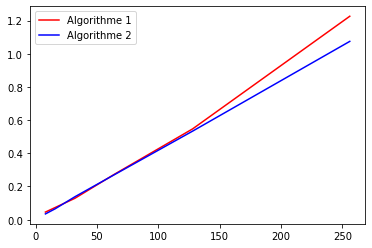

In [20]:
def main() :
    test = [8,16,32,64,128,256,512,1024]
    temps1 = []
    temps2 = []
    for i in test :
        S = P(i)
        print("---------- TEST ALGO 1 ----------")
        res,tps1 = apply_reduction(S,0)
        temps1.append(tps1)
        print("---------- TEST ALGO 2 ----------")
        res2,tps2 = apply_reduction2(S,0.1)
        temps2.append(tps2)
    
    
    plt.plot(test,temps1,"red",label="Algorithme 1")
    plt.plot(test,temps2,"blue",label="Algorithme 2")
    plt.legend()
    plt.show()
        
        
main()